In [58]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
test = test_data["PassengerId"]

In [59]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
def drop_cols(train_data):
  train_data = train_data.drop(["PassengerId", "Name", "Ticket", "Cabin" ], axis = 1)
  return train_data
train_data = drop_cols(train_data)
test_data = drop_cols(test_data)

In [62]:
def convert(train_data):
  train_data['Sex'] = train_data['Sex'].replace(['female','male'],[0,1])
  return train_data
convert(train_data)
convert(test_data)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [63]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [64]:
test_data.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [65]:
def filling_data(train_data):
    train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
    train_data['Fare'].fillna(train_data['Fare'].median(), inplace = True)
    return train_data
train_data = filling_data(train_data)
test_data = filling_data(test_data)

In [66]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [67]:
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [68]:
def fill_emb(train_data):
  train_data['Embarked'] = train_data['Embarked'].fillna('S')
  return train_data
fill_emb(train_data)
fill_emb(test_data)

train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [69]:
def convert_embark(train_data):
  train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
  train_data['Embarked'] = train_data['Embarked'].astype(int)
  return train_data  
convert_embark(train_data)
convert_embark(test_data)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [70]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [71]:
def family(train_data):
  train_data['Family_num'] = train_data['SibSp'] + train_data['Parch'] + 1
  train_data['IsAlone'] = 0
  train_data.loc[train_data['Family_num'] == 1, 'IsAlone'] = 1
  return train_data
family(train_data)
family(test_data)
train_data = train_data.drop(['Parch', 'SibSp', 'Family_num'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'Family_num'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,1,22.0,7.2500,0,0
1,1,1,0,38.0,71.2833,1,0
2,1,3,0,26.0,7.9250,0,1
3,1,1,0,35.0,53.1000,0,0
4,0,3,1,35.0,8.0500,0,1


In [72]:
scaler = preprocessing.MinMaxScaler()
train_data[['Age','Fare']]=scaler.fit_transform(train_data[['Age','Fare']])
test_data[['Age','Fare']]=scaler.fit_transform(test_data[['Age','Fare']])
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,1,0.271174,0.014151,0,0
1,1,1,0,0.472229,0.139136,1,0
2,1,3,0,0.321438,0.015469,0,1
3,1,1,0,0.434531,0.103644,0,0
4,0,3,1,0.434531,0.015713,0,1


In [73]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,1,0.452723,0.015282,2,1
1,3,0,0.617566,0.013663,0,0
2,2,1,0.815377,0.018909,2,1
3,3,1,0.353818,0.016908,0,1
4,3,0,0.287881,0.023984,0,0


In [74]:
x_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]
x_test = test_data


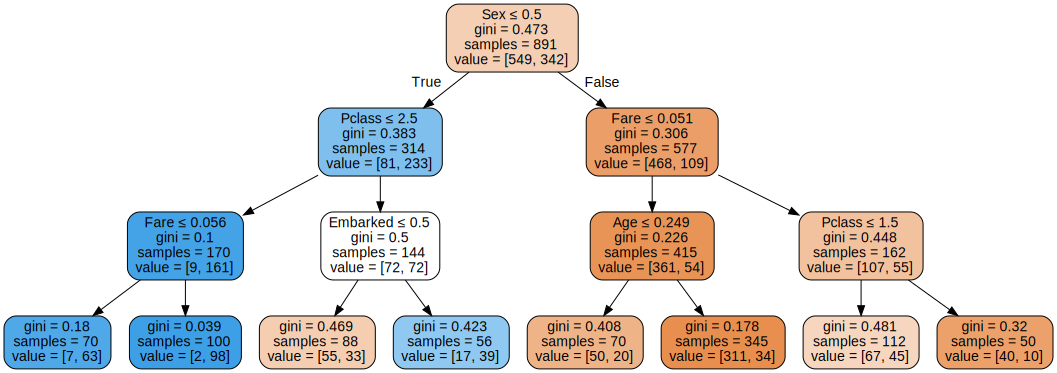

In [75]:
from sklearn import tree
import graphviz
features = list(x_train.columns)
parameters = {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 50}
dtree_model = tree.DecisionTreeClassifier(**parameters)
dtree_model.fit(x_train, y_train)
visual = tree.export_graphviz(dtree_model, out_file=None, filled=True, rounded=True, special_characters=True, feature_names = features)
graph = graphviz.Source(visual)
graph

In [76]:
from sklearn.model_selection import cross_val_score
five_fold_dt = cross_val_score(dtree_model, x_train, y_train, cv=5)
print("Five-Fold Cross validation of decision tree: ", five_fold_dt)
print("Average of Five-Fold Cross validation of decision tree : ", np.average(five_fold_dt))

Five-Fold Cross validation of decision tree:  [0.82681564 0.78651685 0.79775281 0.79775281 0.82022472]
Average of Five-Fold Cross validation of decision tree :  0.8058125666938671


In [84]:
from sklearn.ensemble import RandomForestClassifier
rf_parameters = {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 10}
rf = RandomForestClassifier(**rf_parameters)
rf.fit(x_train, y_train)
five_fold_rf = cross_val_score(rf, x_train, y_train, cv=5)
print("Five-Fold Cross validation of random forest: ", five_fold_rf)
print("Average of Five-Fold Cross of random forest: ", np.average(five_fold_rf))

Five-Fold Cross validation of random forest:  [0.77094972 0.79213483 0.82022472 0.79775281 0.80337079]
Average of Five-Fold Cross of random forest:  0.7968865733475614
